In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [62]:
#loading data
application=pd.read_csv('application_train.csv')
credit_card=pd.read_csv('credit_card_balance.csv')
bureau=pd.read_csv('bureau.csv')
bureau_balance=pd.read_csv('bureau_balance.csv')
installments_payments=pd.read_csv('installments_payments.csv')
POS=pd.read_csv('POS_CASH_balance.csv')
previous_application=pd.read_csv('previous_application.csv')


# Basic Check

In [5]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
application[application.TARGET==1].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,NaN,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0265,NaN,0.0094,NaN,0.0000,0.0168,0.0092,0.9732,NaN,NaN,0.0000,0.0690,0.0417,NaN,0.0271,NaN,0.0083,NaN,0.0000,0.0167,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0270,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0085,Wooden,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.306841,0.320163,0.1309,0.1250,0.9960,0.9456,0.0822,0.16,0.1379,0.2500,0.2917,0.0142,0.1059,0.1267,0.0039,0.0078,0.1334,0.1297,0.9960,0

In [6]:
credit_card[credit_card.SK_ID_CURR==100049].head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
168008,1209367,100049,-9,0.000,90000,NaN,0.0,NaN,NaN,0.0,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
177010,1209367,100049,-12,0.000,90000,NaN,0.0,NaN,NaN,0.0,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
491031,1209367,100049,-13,0.000,90000,NaN,0.0,NaN,NaN,0.0,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
640543,1209367,100049,-4,87047.865,135000,0.0,0.0,0.0,0.0,4626.0,4725.0,193.275,85909.905,87047.865,87047.865,0.0,0,0.0,0.0,3.0,Active,0,0
1108228,1209367,100049,-11,0.000,90000,NaN,0.0,NaN,NaN,0.0,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [6]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [25]:
bureau[bureau.SK_ID_CURR==100049]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
126559,100049,5244757,Active,currency 1,-1052,0,-505.0,-42023.0,0.0,0,84816.00,10890.00,0.000,0.0,Consumer credit,-516,0.0
126560,100049,5244759,Active,currency 1,-568,0,518.0,-42023.0,0.0,0,414000.00,383112.00,0.000,0.0,Credit card,-8,0.0
126561,100049,5244760,Closed,currency 1,-2179,0,-1469.0,-1469.0,0.0,0,141480.00,-4705600.32,-586406.115,0.0,Credit card,-1469,0.0
126562,100049,5244761,Active,currency 1,-27,0,340.0,-42023.0,0.0,0,21375.00,21865.50,-586406.115,0.0,Consumer credit,-18,0.0
126563,100049,5244762,Closed,currency 1,-799,0,-554.0,-554.0,0.0,0,32576.85,0.00,0.000,0.0,Consumer credit,-550,0.0
126564,100049,5244763,Active,currency 1,-700,0,-42060.0,-42023.0,0.0,0,45000.00,36180.00,8819.235,0.0,Credit card,-32,0.0
1401525,100049,5244758,Active,currency 1,-409,0,967.0,-42023.0,0.0,0,112500.00,100395.00,0.000,0.0,Credit card,-27,0.0


In [7]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [31]:
installments_payments[installments_payments.SK_ID_CURR==100049].head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
103702,1232720,100049,1.0,5,-443.0,-444.0,6103.305,6103.305
190966,1209367,100049,0.0,6,-126.0,-143.0,4626.000,65.340
196816,1209367,100049,0.0,10,-65.0,-72.0,5962.275,5962.275
229198,1514918,100049,1.0,10,-1180.0,-1192.0,5800.905,5800.905
249367,1182112,100049,1.0,7,-206.0,-210.0,7801.155,7801.155


In [28]:
POS[POS.SK_ID_CURR==100049].head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
212064,1514918,100049,-39,10.0,0.0,Completed,0,0
325589,1560053,100049,-73,12.0,5.0,Active,0,0
486869,1182112,100049,-10,12.0,8.0,Active,0,0
499789,1182112,100049,-4,12.0,2.0,Active,0,0
647738,1514918,100049,-41,10.0,2.0,Active,0,0


In [33]:
previous_application[previous_application.SK_ID_CURR==100049].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
302143,1514918,100049,Consumer loans,5791.725,33250.5,41251.5,0.0,33250.5,MONDAY,11,Y,1,0.000000,0.034781,0.37315,XAP,Approved,-1480,Cash through the bank,XAP,Children,Repeater,Mobile,POS,XNA,Country-wide,30,Connectivity,10.0,high,POS mobile with interest,365243.0,-1450.0,-1180.0,-1180.0,-1172.0,1.0
766160,1560053,100049,Consumer loans,4543.110,41305.5,40855.5,4131.0,41305.5,SUNDAY,8,Y,1,0.100009,0.034781,0.37315,XAP,Approved,-2426,Cash through the bank,XAP,Family,New,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,high,POS mobile with interest,365243.0,-2395.0,-2065.0,-2065.0,-2062.0,1.0
1418128,1232720,100049,Consumer loans,6103.305,35955.0,30339.0,9000.0,35955.0,FRIDAY,14,Y,1,0.249163,0.034781,0.37315,XAP,Approved,-594,XNA,XAP,Unaccompanied,Repeater,Audio/Video,POS,XNA,Regional / Local,400,Consumer electronics,6.0,high,POS household with interest,365243.0,-563.0,-413.0,-413.0,-410.0,0.0
1551718,1182112,100049,Cash loans,7801.155,67500.0,76131.0,-0.9,67500.0,MONDAY,9,Y,1,-0.000015,0.034781,0.37315,XNA,Approved,-416,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),4,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-386.0,-56.0,-56.0,-53.0,1.0
1663018,1209367,100049,Revolving loans,4500.000,0.0,90000.0,-0.9,0.0,SUNDAY,11,Y,1,-0.000015,0.034781,0.37315,XAP,Approved,-417,XNA,XAP,Unaccompanied,Repeater,XNA,Cards,x-sell,AP+ (Cash loan),4,XNA,0.0,XNA,Card X-Sell,-228.0,-185.0,365243.0,365243.0,365243.0,0.0


In [11]:
## Getting all columns form the dataset
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
credit_card.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [12]:
## Getting all columns form the dataset
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [13]:
## Getting all columns from previious application
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [16]:
application.describe() #view some basic statistical details like percentile, mean, std etc. 

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [17]:
application.describe(include=['O'])#It will give you info about categorical data/columns

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [7]:
credit_card.describe() 

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [13]:
credit_card.describe(include=['O']) 

,NAME_CONTRACT_STATUS
count,3840312
unique,7
top,Active
freq,3698436


In [18]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [19]:
bureau.describe(include=['O'])#It will give you info about categorical data/columns

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
count,1716428,1716428,1716428
unique,4,4,15
top,Closed,currency 1,Consumer credit
freq,1079273,1715020,1251615


In [20]:
bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


In [21]:
bureau_balance.describe(include=['O'])

,STATUS
count,27299925
unique,8
top,C
freq,13646993


In [22]:
installments_payments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [23]:
POS.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [24]:
POS.describe(include=['O'])

,NAME_CONTRACT_STATUS
count,10001358
unique,9
top,Active
freq,9151119


In [24]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [25]:
previous_application.describe(include=['O'])#It will give you info about categorical data/columns

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
count,1670214,1670214,1670214,1670214,1670214,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1669868
unique,4,7,2,25,4,4,9,7,4,28,5,3,8,11,5,17
top,Cash loans,TUESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,XNA,XNA,Cash
freq,747553,255118,1661739,922661,1036781,1033552,1353093,508970,1231261,950809,691011,1063666,719968,855720,517215,285990


# Exploratory Data Analysis¶

### Application Train

In [ ]:
application.groupby('TARGET')['TARGET'].count()

In [23]:
# Univariant Analysis

import sweetviz as sv#importing sweetviz library 
my_application = sv.analyze(application)#syntax to use sweetviz
my_application.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Feature Analysis
* Target Label : 0 (92%) and 1 (8%). The higher correlation ratio with others features : EXT_Source_2 (0.16), EXT_Source_3(0.12), day_birth(0.08),Ext_Source_1(0.06), days_last_phone_changed(0.06), Days_ID_publish(0.05),floor_max_avg(0.05),floor_max_medi(0.05), floor_max_mode(0.05), days_employed(0.04), days_registration(0.04), total_area_mode(0.04), yearbeginpluctu(0.04)

* Ext_Source 2: Numerical association > 0.1 : EXT_SOURCE_10.21, REGION_POPULATION_RELATIVE0.20, DAYS_LAST_PHONE_CHANGE-0.20, HOUR_APPR_PROCESS_START0.16, AMT_GOODS_PRICE0.14, FLOORSMAX_AVG0.14, FLOORSMAX_MEDI0.13, AMT_CREDIT0.13, FLOORSMAX_MODE0.13, AMT_ANNUITY0.13, ELEVATORS_AVG0.12, ELEVATORS_MEDI0.11, FLOORSMIN_AVG0.11, FLOORSMIN_MEDI 0.1, categorical assocaiton >0.1 : REGION_RATING_CLIENT0.29, REGION_RATING_CLIENT_W_CITY0.29, TARGET0.16, NAME_EDUCATION_TYPE0.13, WALLSMATERIAL_MODE0.13, EMERGENCYSTATE_MODE0.13, HOUSETYPE_MODE0.12, OCCUPATION_TYPE0.12

* Ext_Source_3 : numercal association >0.1 : DAYS_BIRTH-0.21, EXT_SOURCE_10.19, DAYS_ID_PUBLISH-0.13, DAYS_EMPLOYED0.11,EXT_SOURCE_20.11, DAYS_REGISTRATION-0.11. Categorical associaiton >0.1 : Target (0.12) and organization_type (0.1).

* Day_birth : The higher numerical association : DAYS_EMPLOYED -0.62, EXT_SOURCE_1 -0.60, DAYS_REGISTRATION 0.33, CNT_CHILDREN 0.33, CNT_FAM_MEMBERS 0.28, DAYS_ID_PUBLISH0.27, EXT_SOURCE_3 -0.21. The higher correlation ratio : ORGANIZATION_TYPE 0.64, NAME_INCOME_TYPE0.62, FLAG_EMP_PHONE0.62, OCCUPATION_TYPE0.45, FLAG_DOCUMENT_60.41, NAME_FAMILY_STATUS0.31, NAME_HOUSING_TYPE0.25, REG_CITY_NOT_WORK_CITY0.24, NAME_EDUCATION_TYPE0.20, REG_CITY_NOT_LIVE_CITY0.18, FLAG_WORK_PHONE0.17,, LIVE_CITY_NOT_WORK_CITY0.16, CODE_GENDER0.15, FLAG_OWN_CAR0.1

* Ext_Source_1 : Feature have significant issing value 56%. The higher Numerical association : AYS_BIRTH -0.60, DAYS_EMPLOYED 0.29, EXT_SOURCE_20.21, EXT_SOURCE_3 0.19, DAYS_REGISTRATION -0.18, AMT_GOODS_PRICE 0.18, AMT_CREDIT 0.17, CNT_CHILDREN -0.14, DAYS_LAST_PHONE_CHANGE -0.13, DAYS_ID_PUBLISH-0.13, AMT_ANNUITY0.12

* Days_last_phone_changed : the most frequent 0 (12,3%), freuent 1 (0.9%), frequent 2 (0,8%). The higher numerical association : EXT_SOURCE_2 -0.20, EXT_SOURCE_1 -0.13, and AMT_REQ_CREDIT_BUREAU_YEAR -0.11.

* Day_ID_publish. The higher numerical association : DAYS_BIRTH 0.27, DAYS_EMPLOYED -0.27, EXT_SOURCE_1 -0.13, EXT_SOURCE_3-0.13. Categorical associaiton : ORGANIZATION_TYPE 0.28, NAME_INCOME_TYPE 0.27, FLAG_EMP_PHONE 0.27, OCCUPATION_TYPE 0.19, FLAG_DOCUMENT_6 0.18, NAME_FAMILY_STATUS 0.11

* Floor_Max_Avg. Feature have missing value 50%. Frequent value 0.1667 (40%) and 0,333 (20.7%). The higher numerical association : FLOORSMAX_MEDI 1.00, FLOORSMAX_MODE 0.99, FLOORSMIN_AVG 0.74, FLOORSMIN_MEDI 0.74, FLOORSMIN_MODE 0.72, ELEVATORS_AVG 0.68, ELEVATORS_MEDI 0.68, ELEVATORS_MODE0.66, TOTALAREA_MODE0.63, LIVINGAREA_AVG 0.63, LIVINGAREA_MEDI 0.63, APARTMENTS_AVG 0.62, APARTMENTS_MEDI 0.62, LIVINGAREA_MODE 0.60. The higher categorical association : WALLSMATERIAL_MODE 0.78, HOUSETYPE_MODE0.73, EMERGENCYSTATE_MODE 0.71, FONDKAPREMONT_MODE 0.56, REGION_RATING_CLIENT_W_CITY0.29, REGION_RATING_CLIENT0.28, REG_CITY_NOT_WORK_CITY 0.24. LIVE_CITY_NOT_WORK_CITY0.18, NAME_EDUCATION_TYPE 0.16, REG_CITY_NOT_LIVE_CITY 0.14, ORGANIZATION_TYPE 0.12, NAME_INCOME_TYPE 0.11, OCCUPATION_TYPE 0.10.

* FloorMax_Medi. Feature have missing value 50%. Frequent value 0.1667 (41,2%) and 0,333 (21.5%). The higher numerical and categorical  association almost the same with floormax_avg. 

* floor_max_mode :  Feature have missing value 50%. Frequent value, numerical association, and categorical assocatioan the same with floormax_avg and floorMax_Medi.

* days_employed.  The most frequent value 365243 (18%). The higher numerical association : DAYS_BIRTH-0.62, EXT_SOURCE_1 0.29, DAYS_ID_PUBLISH -0.27, CNT_CHILDREN -0.24, CNT_FAM_MEMBERS -0.23, DAYS_REGISTRATION -0.21, EXT_SOURCE_30.11, AMT_ANNUITY -0.10. The higher categorical association : ORGANIZATION_TYPE1.00, NAME_INCOME_TYPE1.00, FLAG_EMP_PHONE1.00, OCCUPATION_TYPE0.69, FLAG_DOCUMENT_60.60, REG_CITY_NOT_WORK_CITY0.25, NAME_FAMILY_STATUS0.25, FLAG_DOCUMENT_30.25, FLAG_WORK_PHONE0.23, LIVE_CITY_NOT_WORK_CITY 0.22, CODE_GENDER 0.16, FLAG_OWN_CAR 0.15, NAME_EDUCATION_TYPE 0.14, FLAG_DOCUMENT_8 0.12.

* days_registration. The higher numerical association : AYS_BIRTH0.33, DAYS_EMPLOYED -0.21, CNT_CHILDREN0.18, EXT_SOURCE_1-0.18, CNT_FAM_MEMBERS0.17, YEARS_BUILD_AVG 0.16, YEARS_BUILD_MEDI 0.16, YEARS_BUILD_MODE0.16, EXT_SOURCE_3-0.11, DAYS_ID_PUBLISH0.10. The hihger categorical association : ORGANIZATION_TYPE0.22, NAME_INCOME_TYPE 0.21, FLAG_EMP_PHONE 0.21, OCCUPATION_TYPE0.16, FLAG_DOCUMENT_60.14, NAME_FAMILY_STATUS0.11, NAME_EDUCATION_TYPE0.10

* total_area_mode. Feature hve missing value 48%. Feature have numerical association with LIVINGAREA_AVG0.93, LIVINGAREA_MEDI0.92, LIVINGAREA_MODE0.90, APARTMENTS_AVG0.89, APARTMENTS_MEDI0.89, APARTMENTS_MODE0.86, LIVINGAPARTMENTS_AVG0.85, LIVINGAPARTMENTS_MEDI0.85, ELEVATORS_AVG0.84, ELEVATORS_MEDI0.84, LIVINGAPARTMENTS_MODE0.83, ELEVATORS_MODE0.82, BASEMENTAREA_AVG0.67, BASEMENTAREA_MEDI0.67. Feature have categorical value with WALLSMATERIAL_MODE0.62,EMERGENCYSTATE_MODE0.55, HOUSETYPE_MODE0.54, FONDKAPREMONT_MODE0.43, REGION_RATING_CLIENT_W_CITY0.24 REGION_RATING_CLIENT0.23, REG_CITY_NOT_WORK_CITY0.19, LIVE_CITY_NOT_WORK_CITY0.15, NAME_EDUCATION_TYPE0.13, REG_CITY_NOT_LIVE_CITY0.11, ORGANIZATION_TYPE0.10

* YEARS_BEGINEXPLUATATION_AVG. Feature have missing value 49%. Numerical association : YEARS_BEGINEXPLUATATION_MEDI0.99, YEARS_BEGINEXPLUATATION_MODE0.97, YEARS_BUILD_AVG0.48, YEARS_BUILD_MEDI0.48, YEARS_BUILD_MODE0.48, FLOORSMIN_AVG0.17, FLOORSMIN_MEDI0.17, FLOORSMIN_MODE0.16, LIVINGAPARTMENTS_MEDI0.15, LIVINGAPARTMENTS_AVG0.15,LIVINGAPARTMENTS_MODE0.14, FLOORSMAX_AVG0.13, FLOORSMAX_MEDI0.13, FLOORSMAX_MODE0.13. Categorical associatiaon : EMERGENCYSTATE_MODE0.97,HOUSETYPE_MODE0.96, WALLSMATERIAL_MODE0.95, FONDKAPREMONT_MODE0.66, REG_CITY_NOT_WORK_CITY0.27,LIVE_CITY_NOT_WORK_CITY 0.20,REGION_RATING_CLIENT_W_CITY0.18, REGION_RATING_CLIENT0.17,REG_CITY_NOT_LIVE_CITY0.16, NAME_EDUCATION_TYPE0.12, ORGANIZATION_TYPE0.12

* YEARS_BEGINEXPLUATATION_MEDI. Feature have missing value 49%. Numerical and categorical association the same with YearBigienxplaiton_avg.


### Missing values > 50%
* OWN_CAR_AGE
* EXT_SOURCE_1
* APARTMENTS_AVG
* BASEMENTAREA_AVG
* YEARS_BUILD_AVG
* COMMONAREA_AVG
* ELEVATORS_AVG
* ENTRANCES_AVG
* FLOORSMIN_AVG
* LANDAREA_AVG
* LIVINGAPARTMENTS_AVG
* LIVINGAREA_AVG
* NONLIVINGAPARTMENTS_AVG
* NONLIVINGAREA_AVG
* APARTMENTS_MODE
* BASEMENTAREA_MODE
* YEARS_BUILD_MODE
* COMMONAREA_MODE
* ELEVATORS_MODE
* ENTRANCES_MODE
* FLOORSMIN_MODE
* LANDAREA_MODE
* LIVINGAPARTMENTS_MODE
* LIVINGAREA_MODE
* NONLIVINGAPARTMENTS_MODE
* NONLIVINGAREA_MODE
* APARTMENTS_MEDI
* BASEMENTAREA_MEDI
* YEARS_BUILD_MEDI
* COMMONAREA_MEDI
* ELEVATORS_MEDI
* ENTRANCES_MEDI
* FLOORSMIN_MEDI
* LANDAREA_MEDI
* LIVINGAPARTMENTS_MEDI
* LIVINGAREA_MEDI
* NONLIVINGAPARTMENTS_MEDI
* NONLIVINGAREA_MEDI
* FONDKAPREMONT_MODE
* HOUSETYPE_MODE
* WALLSMATERIAL_MODE
* EMERGENCYSTATE_MODE

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

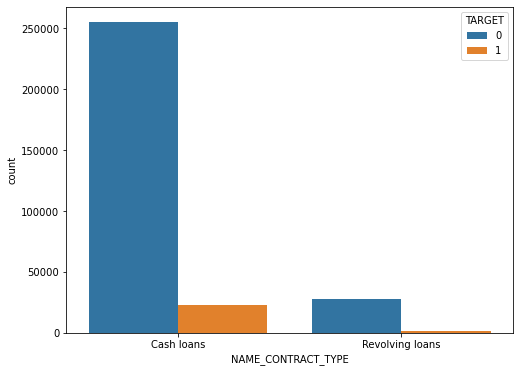

In [26]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='NAME_CONTRACT_TYPE', hue='TARGET', data=application )

* Name_Contract_Type Profile :  Cashloan (90%) and Revolving Loans (10%)
* Probability of default Cashloan is higher tahn Revolving

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

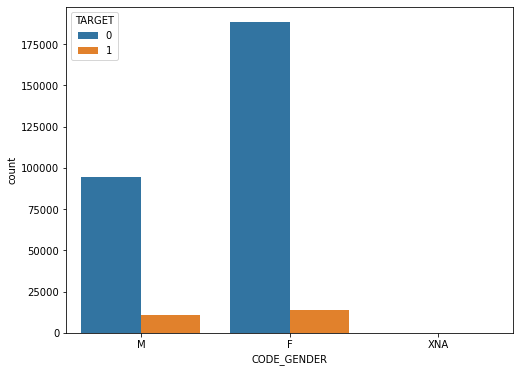

In [27]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='CODE_GENDER', hue='TARGET', data=application )

* Code_Gender Profile : Femail 66%, Male 34%, and XNA < 1%
* Probability of default Man is higher dan Woman..

<AxesSubplot:xlabel='FLAG_OWN_CAR', ylabel='count'>

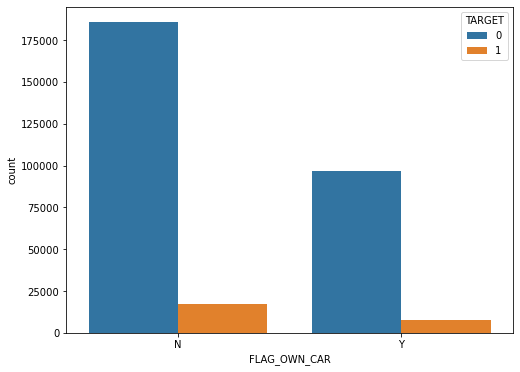

In [28]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='FLAG_OWN_CAR', hue='TARGET', data=application )

* Flag_Own_Car :  Data have flag own car 'N' 66% and 'Y' 34%.
* Probability of default flag_own_Card 'N' is higher than Y

<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='count'>

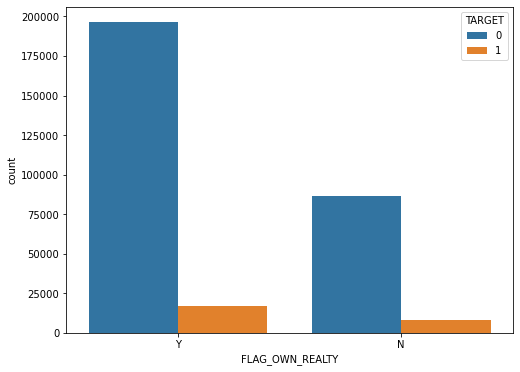

In [29]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='FLAG_OWN_REALTY', hue='TARGET', data=application )

* Flag_Own_Realty : Data have flag own Realty 'Y' 69% and 'N' 31%.
* Probability of defaul have the same ratio

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

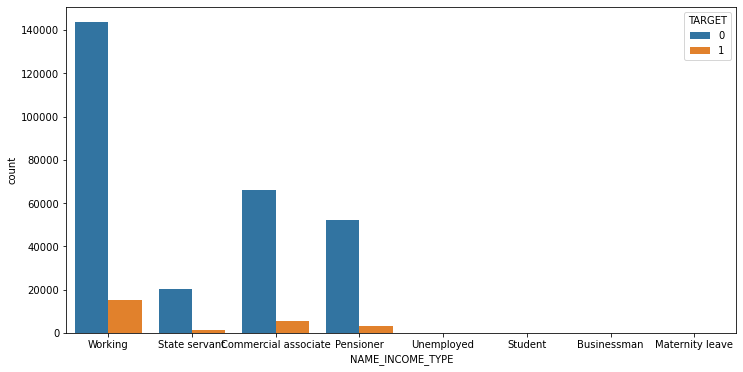

In [30]:
fig, ax = plt.subplots( figsize = (12,6) )
sns.countplot( x='NAME_INCOME_TYPE', hue='TARGET', data=application )

* Name_Income_Type Profile : Working 52%, Commercial assocaite 23%, pensioner 18%, state servant 7%, other < 1%.
* Unemployed and Maternity leave have less data but have the higher probability of default from others

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

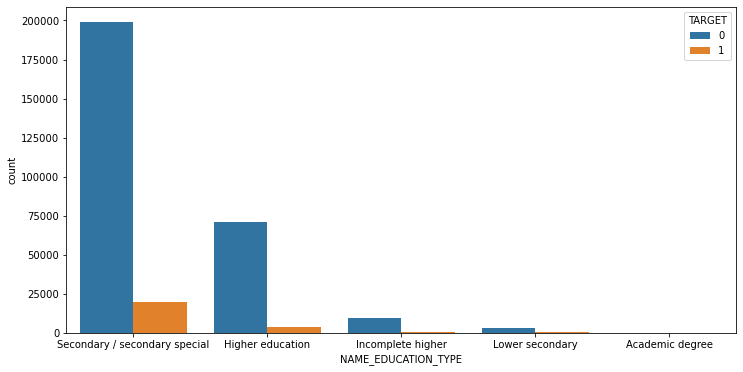

In [31]:
fig, ax = plt.subplots( figsize = (12,6) )
sns.countplot( x='NAME_EDUCATION_TYPE', hue='TARGET', data=application )

* Name_Education_Type Profile : Secondary 71%, higher education 24%, incomplete higher 3%, lower secondary 1%, and academic degree < 1%

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='count'>

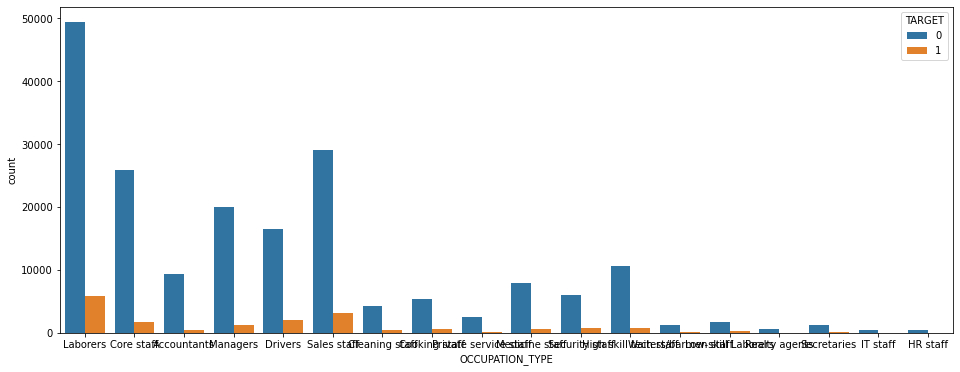

In [32]:
fig, ax = plt.subplots( figsize = (16,6) )
sns.countplot( x='OCCUPATION_TYPE', hue='TARGET', data=application )

<AxesSubplot:xlabel='WEEKDAY_APPR_PROCESS_START', ylabel='count'>

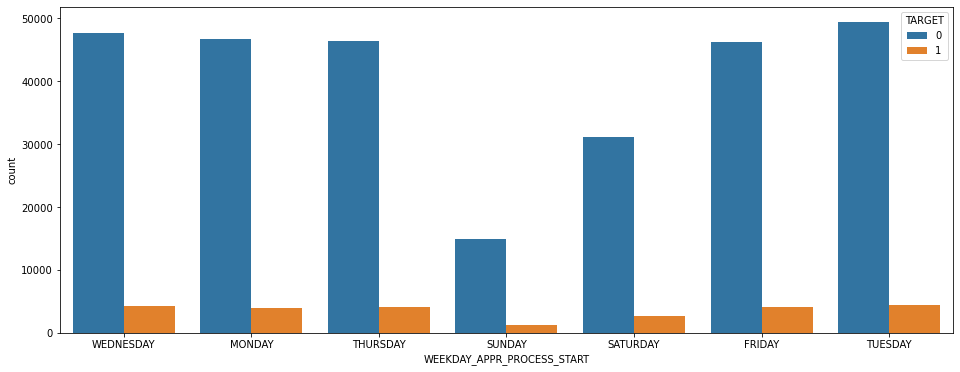

In [33]:
fig, ax = plt.subplots( figsize = (16,6) )
sns.countplot( x='WEEKDAY_APPR_PROCESS_START', hue='TARGET', data=application )
 

* Weekday_Appr_Process_Start  profile : Tuesday 18%, wednesday 17%, Monday 16%, thursday 16%, friday 16%, saturday 11%, and sunday 5%.

### Bearue

In [24]:
# Univariant Analysis
import sweetviz as sv#importing sweetviz library 
my_bureau = sv.analyze(bureau)#syntax to use sweetviz
my_bureau.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Evaluation Bearue
* Credit Active : Closed 63% and active 37%. The higher correlation ratio with other features : DAYS_ENDDATE_FACT 0.65, DAYS_CREDIT_UPDATE 0.48, DAYS_CREDIT0.45, DAYS_CREDIT_ENDDATE 0.28, AMT_CREDIT_SUM_DEBT 0.24, AMT_CREDIT_SUM 0.13, AMT_CREDIT_SUM_LIMIT0.12
* Credit Currency : Currency 1 99% and the higher correlation ratio : AMT_Credit_Sum (0.12)
* Credit Type : Credit Consumer 73% and credit card 23%. The higher correlation ratio : AMT_CREDIT_SUM0.50, AMT_CREDIT_SUM_DEBT 0.47, DAYS_CREDIT_ENDDATE 0.37, DAYS_ENDDATE_FACT 0.32, DAYS_CREDIT_UPDATE 0.23, AMT_CREDIT_SUM_LIMIT0.20, DAYS_CREDIT 0.16
* Day Credit : The higher numerical association : DAYS_ENDDATE_FACT 0.88, DAYS_CREDIT_UPDATE 0.69, DAYS_CREDIT_ENDDATE 0.23, AMT_CREDIT_SUM_DEBT 0.14. The higher categorical association :  CREDIT_ACTIVE0.45, CREDIT_TYPE0.16
* Day Credit Enddate :  The higher numerical associaiton :DAYS_ENDDATE_FACT0.25, DAYS_CREDIT_UPDATE0.25, DAYS_CREDIT0.23. The higher categorical associaiton : CREDIT_TYPE 0.37, CREDIT_ACTIVE 0.28, CNT_CREDIT_PROLONG 0.12


In [65]:
cat_bureau=bureau.select_dtypes(include='object').columns
categorical_col = []#list
for column in cat_bureau:#for loop to acess columns form dataset 
    categorical_col.append(column)#appending those columns in the list who statisfy the condition 
    print(f"{column} : {bureau[column].unique()}")#output
    print("====================================")

CREDIT_ACTIVE : ['Closed' 'Active' 'Sold' 'Bad debt']
CREDIT_CURRENCY : ['currency 1' 'currency 2' 'currency 4' 'currency 3']
CREDIT_TYPE : ['Consumer credit' 'Credit card' 'Mortgage' 'Car loan' 'Microloan'
 'Loan for working capital replenishment' 'Loan for business development'
 'Real estate loan' 'Unknown type of loan' 'Another type of loan'
 'Cash loan (non-earmarked)' 'Loan for the purchase of equipment'
 'Mobile operator loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)']


<AxesSubplot:xlabel='CREDIT_ACTIVE', ylabel='count'>

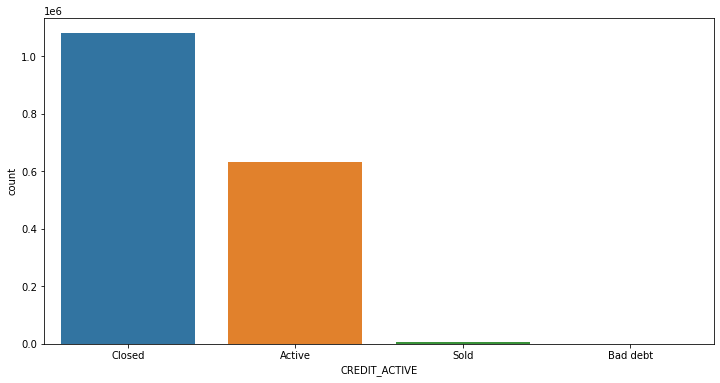

In [69]:
fig, ax = plt.subplots( figsize = (12,6) )
sns.countplot( x='CREDIT_ACTIVE', data=bureau )

In [74]:
bureau.groupby('CREDIT_ACTIVE')['SK_ID_BUREAU'].count()

CREDIT_ACTIVE
Active       630607
Bad debt         21
Closed      1079273
Sold           6527
Name: SK_ID_BUREAU, dtype: int64

* Credit Aktive profile : ACTIVE 36% and Closed 63%

<AxesSubplot:xlabel='CREDIT_CURRENCY', ylabel='count'>

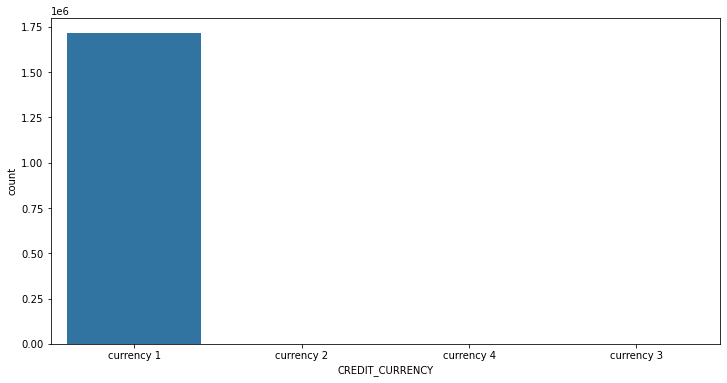

In [70]:
fig, ax = plt.subplots( figsize = (12,6) )
sns.countplot( x='CREDIT_CURRENCY', data=bureau )

<AxesSubplot:xlabel='CREDIT_TYPE', ylabel='count'>

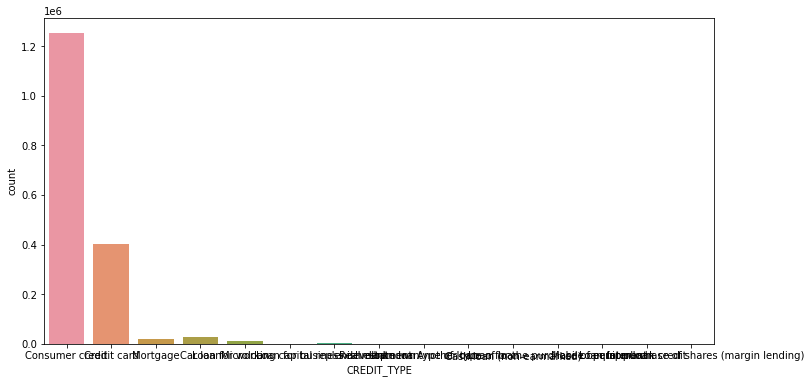

In [71]:
fig, ax = plt.subplots( figsize = (12,6) )
sns.countplot( x='CREDIT_TYPE', data=bureau )

### Explatonory POS

In [43]:
# Univariant Analysis

import sweetviz as sv#importing sweetviz library 
my_POS = sv.analyze(POS)#syntax to use sweetviz
my_POS.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Table POS : table have 8 features : 1 Categorical & 7 numerical

* Name Contract Status : 91% status active (9,2 Mio data), 7% status completed(744.883 data), and others < 1%. The Higher correaltion ratio with other feature: SK_DPD_DEF (0.62), CNT_INSTALLMENT_FEATURE(0.27), SK_DPD(0.2), CNT_INSTALLMENT (0.19).
* Month balance : The higher association with other features : CNT_INSTALLMENT (0.34) and CNT_INSTALLMENT_FEATURE(0.27)
* Cnt_installment : frequent 12 (25%), frequent 24(15,2%),frequent 10 (12,5%), frequent 6 (10,7%), and others <10%. The higher association with other features : CNT_Intallment_Feature(0.87) and Month balance(0.34)
* Cnt_Installment_feature : frequent 0(11,9%), 6(6,2%),4(6,2%), 5(6%), 3(5,8%),2(5,5%),1(5,1%), and others <5%. The higher association with other features : CNT_Intallment(0.87) and Month balance(0.27)
* SK_DPD : frequent 0 (97%). the highest association with other features : SK_DPD_DEF(0.25)
* SK_DPD_DEF :frequen 0 (98%) and the highest association with SK_DPD (0.25)



<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

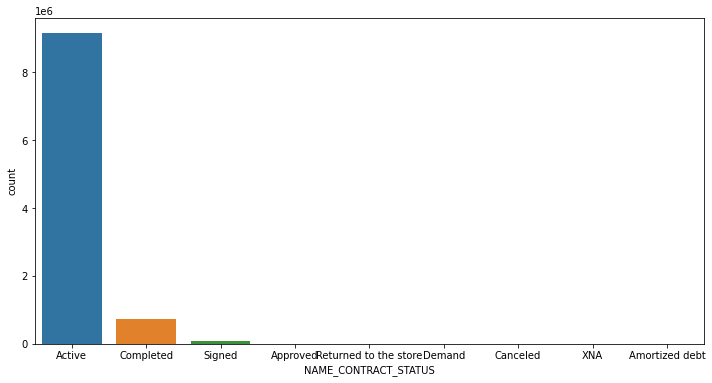

In [67]:
fig, ax = plt.subplots( figsize = (12,6) )
sns.countplot( x='NAME_CONTRACT_STATUS', data=POS )

### Previous Application

In [27]:
# Univariant Analysis

import sweetviz as sv#importing sweetviz library 
my_prev_application = sv.analyze(previous_application)#syntax to use sweetviz
my_prev_application.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


* Name Contract Type profile : Cash Loan 44%, Consumer Loan 44%, and revolving loan 12%
* Flag last application per contract : Flaging 'Y' > 99%
* Nplag last application per day : Flaging '1' > 99%
* Name Cash Loan Purpose : XAP 55% and  XNA 41%
* Name Contract Status profile : Approved 62%, canceled 19%, refused 17%', unused after 2%.
* Name Payment Type profile : Cash through the bank 62%, XNA 38%, others < 1%
* Code Reject reasion : XAP 81%,  HC 10%, and others 9%
* Name suite type profile :  missing 49% and non missing 51% ( unaccompany 60%, family 25%, others 15%)
* Name Client type profile : repeater 74%, new 18%, and others 8%.
* Name Good category profile : XNA 57% , mobile 13%, and other 30%.
* Name product type : XNA 64%, xsell 27%, and walkin 9%.
* Channel Type profile : Credit and cash office 43%, country wide 30%, stone 13%, and other 14%.
* Name seller industry : XNA 51%, consumer electronic 24%, connectivity 17%, and others 8%.
* Neam yield group : XNA 31%, middle 23%, high 21%, low normal 19%, and low action 6%.
* product combination :  cash 17%, POS household with interes 16%,  POS mobile with interest 13%, and others 54%.
* Nflag insured on approval : 0 (67%) and 1 (33%.)

In [63]:
cat_previous=previous_application.select_dtypes(include='object').columns
categorical_col = []#list
for column in cat_previous:#for loop to acess columns form dataset 
    categorical_col.append(column)#appending those columns in the list who statisfy the condition 
    print(f"{column} : {previous_application[column].unique()}")#output
    print("====================================")



NAME_CONTRACT_TYPE : ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
WEEKDAY_APPR_PROCESS_START : ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
FLAG_LAST_APPL_PER_CONTRACT : ['Y' 'N']
NAME_CASH_LOAN_PURPOSE : ['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']
NAME_CONTRACT_STATUS : ['Approved' 'Refused' 'Canceled' 'Unused offer']
NAME_PAYMENT_TYPE : ['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer']
CODE_REJECT_REASON : ['XAP' 'HC' 'LIMIT' 'CLIENT' 'SCOFR' 'SCO' 'XNA' 'VERIF' 'SYSTEM']

# Data Preprocessing

### Checking for nul value

In [7]:
#Significat missing value > 50%
miss_app=['OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG',
         'ENTRANCES_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG',
          'NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE',
          'ENTRANCES_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE',
          'NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI',
          'ENTRANCES_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI',
          'NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE'
         ]


In [8]:
# drop significatn miss value
application=application.drop(application[miss_app],axis=1)

In [9]:
application.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [10]:
# Categorical Miss value for application table
for name in application.select_dtypes(include='object').columns:
    application[name] = application[name].fillna(application[name].mode()[0])
    

In [11]:
application.select_dtypes(include='object').isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [12]:
# Filling Non Categorical Miss value application
for name in application.columns:
    application[name] = application[name].fillna(application[name].min())

In [15]:
credit_card.isnull().sum()

SK_ID_PREV                    0
SK_ID_CURR                    0
MONTHS_BALANCE                0
AMT_BALANCE                   0
AMT_CREDIT_LIMIT_ACTUAL       0
AMT_DRAWINGS_ATM_CURRENT      0
AMT_DRAWINGS_CURRENT          0
AMT_DRAWINGS_OTHER_CURRENT    0
AMT_DRAWINGS_POS_CURRENT      0
AMT_INST_MIN_REGULARITY       0
AMT_PAYMENT_CURRENT           0
AMT_PAYMENT_TOTAL_CURRENT     0
AMT_RECEIVABLE_PRINCIPAL      0
AMT_RECIVABLE                 0
AMT_TOTAL_RECEIVABLE          0
CNT_DRAWINGS_ATM_CURRENT      0
CNT_DRAWINGS_CURRENT          0
CNT_DRAWINGS_OTHER_CURRENT    0
CNT_DRAWINGS_POS_CURRENT      0
CNT_INSTALMENT_MATURE_CUM     0
NAME_CONTRACT_STATUS          0
SK_DPD                        0
SK_DPD_DEF                    0
dtype: int64

In [14]:
# replacing missing value with min
for name in credit_card.columns:
    credit_card[name] = credit_card[name].fillna(credit_card[name].min())

In [16]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [17]:
#replace miss data bureau
for name in bureau.columns:
    bureau[name] = bureau[name].fillna(bureau[name].min())

In [18]:
bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [19]:
installments_payments.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [20]:
#replace missing for installment_payment with min
for name in installments_payments.columns:
    installments_payments[name] = installments_payments[name].fillna(installments_payments[name].min())

In [21]:
POS.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [61]:
#replace missing for POST with min
for name in POS.columns:
    POS[name] = POS[name].fillna(POS[name].min())

In [62]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [22]:
#replace categorical with mode
for name in previous_application.select_dtypes(include='object').columns:
    previous_application[name] =previous_application[name].fillna(previous_application[name].mode()[0])

In [23]:
#replace non categorical with mode
for name in previous_application.columns:
    previous_application[name] = previous_application[name].fillna(previous_application[name].min())

### Merge data

In [24]:
# Create sumary credit_card 
credit_card_1=credit_card.groupby('SK_ID_CURR')['AMT_BALANCE','AMT_CREDIT_LIMIT_ACTUAL','AMT_DRAWINGS_CURRENT','AMT_INST_MIN_REGULARITY',
                                              'AMT_PAYMENT_TOTAL_CURRENT','AMT_TOTAL_RECEIVABLE','CNT_DRAWINGS_CURRENT'].sum()

In [26]:
#Merge Sum_Bureau and sum bureau balance
#bureau=bureau.merge(bureau_balance, on=['SK_ID_BUREAU'],how='left')
#bureau.rename(columns = {'MONTHS_BALANCE':'MONTHS_BALANCE_BUREAU'}, inplace = True)
bureau=bureau.groupby(['SK_ID_CURR'])['AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_SUM_OVERDUE'].sum()



In [29]:
# create sumary POS CASH BALANCE
POS_1=POS.groupby('SK_ID_CURR')['CNT_INSTALMENT','CNT_INSTALMENT_FUTURE'].sum()

In [32]:
# Create Sumary  installment_payment
installment_payments_1=installments_payments.groupby ('SK_ID_CURR')['AMT_INSTALMENT','AMT_PAYMENT'].sum()

In [35]:
# Create New Table from Previous Application
previous_application_1=previous_application.groupby('SK_ID_CURR')['AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                                                                'AMT_DOWN_PAYMENT','NFLAG_LAST_APPL_IN_DAY',
                                                               'NFLAG_INSURED_ON_APPROVAL'].sum()


In [36]:
#Merge dataset
new_app=application.merge(previous_application_1, on=['SK_ID_CURR'],how='left')
new_app=new_app.merge(credit_card_1, on=['SK_ID_CURR'],how='left')
new_app=new_app.merge(bureau_1, on=['SK_ID_CURR'],how='left')
new_app=new_app.merge(installment_payments_1,on=['SK_ID_CURR'],how='left')
new_app=new_app.merge(POS_1,on=['SK_ID_CURR'],how='left')


In [37]:
#replace missing for installment_payment
for name in  new_app.columns:
    new_app[name] = new_app[name].fillna(new_app[name].min())

In [73]:
new_app.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

### Convert Categorical data

#### Label Encoder

In [38]:
new_app1=new_app.copy()
cat_app=new_app1.select_dtypes(include='object').columns


In [39]:
all_labelencoders = {}

for name in cat_app:
    labelencoder = LabelEncoder()
    all_labelencoders[name] = labelencoder

    labelencoder.fit(new_app1[name] )
    new_app1[name] = labelencoder.transform(new_app1[name] )

# Create Model 

In [48]:
#Independent and dependent variable creation
X=new_app1.drop(["TARGET","SK_ID_CURR"],axis=1)
y=new_app1.TARGET

In [50]:
#Traning and testing data creation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### XGBoosting 

In [56]:
## model creation XGBOOSTING
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat=xgb_r.predict(X_test)#predicting the price

In [57]:
## evaluatin the model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix# to check model performance
accu_scor_xbr=accuracy_score(y_test,y_hat)
accu_scor_xbr

0.9196299367510528

In [58]:
f1_xgb=f1_score(y_test,y_hat,average='weighted')
f1_xgb

0.8876542666139403

In [59]:
print(confusion_matrix(y_test,y_hat))

[[56333   221]
 [ 4722   227]]


### KNN Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
y_knn=KNN.predict(X_test)#predicting the price

In [32]:
#KNN Score
accu_scor_knn=accuracy_score(y_test,y_knn)
accu_scor_knn

0.9036632359397102

In [37]:
f1_knn=f1_score(y_test,y_knn,average='weighted')
f1_knn

0.8776038957381643

In [40]:
print(confusion_matrix(y_test,y_knn))

[[55392  1162]
 [ 4763   186]]


### Bagging base estimator is KNN

In [34]:
from sklearn.ensemble import BaggingClassifier

model_bagg=BaggingClassifier(base_estimator=KNN,n_estimators=20,random_state=15)

model_bagg.fit(X_train,y_train)

y_hat_bagg=model_bagg.predict(X_test)

In [35]:
#bag Score
accu_scor_bagg=accuracy_score(y_test,y_hat_bagg)
accu_scor_bagg

0.9079719688470481

In [36]:
f1_bagg=f1_score(y_test,y_hat_bagg,average='weighted')
f1_bagg

0.8789422768175791

In [39]:
print(confusion_matrix(y_test,y_hat_bagg))

[[55700   854]
 [ 4806   143]]
